In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [98]:
#given parameters
L=50 # pipe length
r=0.1 # pipe radius
n=100 # of nodes used
m= 3 # kg/s mass rate flow
Cp=4180 # J/kg* K heat capacity of water
rho= 1000 # kg/mg^3, density of water
pi=3.14159

Ti=400 #K, pipe inlet temperature
T0= 300 #K, pipe fluid initial temperature

q_flux= 100000 # W/m^2, heat flux in fluid

t_final =700 #s, simulation time
dt=1 #s, time step
dx=L/n #m, node thickness

In [99]:
x=np.linspace(dx,L-dx/2,n)
T=np.zeros(n)
dTdt=np.zeros(n)
T.fill(T0)
T_i=np.zeros((t_final,n))
t=np.arange(0,t_final,dt)
Tss=Ti+q_flux*2*pi*r*x/(m*Cp)

In [100]:
for i in range(1,len(t)):        
    dTdt[1:n]=(q_flux*2*pi*r*dx + m*Cp*(T[0:n-1]-T[1:n]))/(rho*Cp*pi*dx*r**2)
    dTdt[0]=(q_flux*2*pi*r*dx + m*Cp*(Ti-T[0]))/(rho*Cp*pi*dx*r**2)
    
    T=T+dTdt*dt
    T_i[i,:]=T

In [103]:
def map(T_i):
    plt.clf()
    plt.plot(x,T_i,color='blue',label='Transient State')
    plt.plot(x,Tss,color='red',label='Steady State')
    plt.xlabel('Distance') 
    plt.ylabel('Temperature')
    plt.axis([0,L,298,750])
    return plt

MovieWriter ffmpeg unavailable; using Pillow instead.


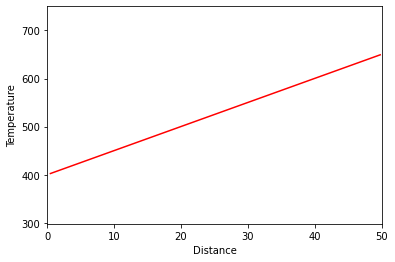

In [104]:
def animate(i):
    map(T_i[i,:])
anim = animation.FuncAnimation(plt.figure(), animate, interval=dt, frames=t_final, repeat=False)
anim.save("Temperature_grid.gif")
plt.draw()
plt.show()